In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv


In [2]:
#Load the dataset
books = pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv')

## Assessing Dataa

In [3]:
#get the first 5 rows
books.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [5]:
books.dtypes

Order Number              int64
Order Status             object
Book Name                object
Order Date & Time        object
City                     object
Payment Method           object
Total items               int64
Total weight (grams)    float64
dtype: object

In [6]:
books.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [7]:
books.shape

(19239, 8)

In [8]:
books.size

153912

In [9]:
books.describe()

,Order Number,Total items,Total weight (grams)
count,19239.000000,19239.000000,19239.000000
mean,52535.780238,6.051874,363.749675
std,15835.761148,576.938452,834.097325
min,307.000000,0.000000,200.000000
25%,48064.500000,1.000000,200.000000
50%,56436.000000,1.000000,200.000000
75%,63779.500000,1.000000,500.000000
max,71420.000000,80022.000000,55000.000000


It appears that there is an outlier in the dataset.Check the corresponding row at the maximum value for further examination


In [10]:
books[books['Total items']== 80022]


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
15981,66499,Returned,انٹرنیٹ سے پیسہ کمائیں,12/27/2020 1:37,City,EasyPaisa,80022,200.0


In [11]:
#Removing a specific row (index 15981) from the 'books' DataFrame
 
books = books.drop(15981)

In [12]:
#Display the count of unique values in the 'Order Status' column
books['Order Status'].value_counts()


Order Status
Completed    17948
Returned      1141
Cancelled      149
Name: count, dtype: int64

In [13]:
#Display the count of unique values in the 'Payment Method' column

books['Payment Method'].value_counts()


Payment Method
Cash on delivery          17470
EasyPaisa                   696
JazzCash                    596
BankTransfer                459
Cash on Delivery (COD)        7
Name: count, dtype: int64

There is an issue with the presence of duplicate entries for "Cash on delivery" and "Cash on Delivery (COD)".

In [14]:
#Display the count of unique values in the 'City' column

books['City'].value_counts()


City
Karachi                                                                       2332
Lahore                                                                        1993
Islamabad                                                                      859
Rawalpindi                                                                     645
Faisalabad                                                                     478
                                                                              ... 
Distt.Rahim Yar Khan                                                             1
MAJID IQBAL SATTI PLOT # 150, SECTOR # 23 KORANGI INDUATRIAL AREA KARACHI.       1
Gulberg 3 Lahore                                                                 1
Sadat Pur Rehlein P /O Retra                                                     1
Mailsi, district Vehari                                                          1
Name: count, Length: 4163, dtype: int64

The presence of addresses or detailed location information suggests potential inconsistency in how city information is recorded

In [15]:
# Checking for missing values in the 'books' DataFrame

books.isna().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

In [16]:
# Checking for duplicates in the 'books' DataFrame
books.duplicated().sum()


0

# DATA QUALITY ISSUES

1. **Data Type Incorrect:**
   - The 'Order Date & Time' column is currently stored as an object. It should be converted to datetime for proper date and time handling.
   - The 'Total weight (grams)' column is stored as a float64. If it represents whole numbers of grams,convert it to integer type (int64).

2. **Outliers:**
   - There appears to be a potential outlier in the 'Total weight (grams)' column, where the maximum value is significantly higher than the upper bound.

3. **Missing Columns for Months and Year:**
   - There are no separate columns for 'Month' and 'Year' information. It would be beneficial to extract and store this information for analysis.

4. **Duplicate Entries in 'Payment Method':**
   - The 'Payment Method' column contains duplicate entries for 'Cash on Delivery.' This might be an error or requires clarification.

5. **Inconsistent 'Book Names':**
   -  'Book Name' column contains multiple books within the same entry and  want to separate them for analysis.

6. **Inconsistent 'City' Values:**
   - The 'City' column has inconsistent values such as 'karachi' and 'Karachi.' Standardizing these entries will ensure uniformity.
7. **Null values**

# CLEANING DATA
### Before cleaning the data, it is a best practice to create a copy of the original dataset.







In [17]:
org_books = books.copy()

In [18]:
# Convert the 'Order Date & Time' column to datetime format
org_books['Order Date & Time'] = pd.to_datetime(org_books['Order Date & Time'])

# Extract the year from the 'Order Date & Time' column and create a new 'Year' column
org_books['Year'] = org_books['Order Date & Time'].dt.strftime('%Y')

# Extract the month from the 'Order Date & Time' column and create a new 'Month' column
org_books['Month'] = org_books['Order Date & Time'].dt.strftime('%B')

# Extract the day from the 'Order Date & Time' column and create a new 'Day' column
org_books['Day'] = org_books['Order Date & Time'].dt.strftime('%a')


strftime is employed here to format the datetime objects in the 'Order Date & Time' column as strings with the desired representations of year, month, and day. This makes it easier to work with and analyze time-related data

In [19]:
# Convert 'Total weight (grams)' to integer type
org_books['Total weight (grams)'] = org_books['Total weight (grams)'].astype('int64')

# Convert 'Order Status' to categorical type
org_books['Order Status'] = org_books['Order Status'].astype('category')

In [20]:
org_books['City'].fillna('Unknown',inplace=True) #inplace=True to update the dataframe

In [21]:
import re

# Apply a lambda function to remove non-alphabet characters from the "City" column
org_books["City"] = org_books["City"].apply(lambda x: re.sub(r'[^a-zA-Z ]', ' ', str(x)))


In [22]:
cities = ["karachi", "lahore", "multan", "faisalabad", "islamabad", "rawalpindi", "sialkot",
    "kashmir", "jacobabad", "mianwali", "nawabshah", "sargodha", "quetta", "peshawar", 
    "gujranwala", "bahawalpur", "sukkur", "sheikhupura", "rahimyar khan", "jhang", 
    "gujrat", "sahiwal", "attock", "dera ismail khan", "muzaffarabad", "mirpur", 
    "kohat", "saddar", "bannu", "kamoke", "mandi bahauddin", "wah", "dera ghazi khan", 
    "kasur", "okara", "chiniot", "kandhkot", "khuzdar", "daska", "dera murad jamali", 
    "gujar khan", "mardan", "chaman", "jalalpur", "hafizabad", "sadiqabad", 
    "burewala", "jacobabad", "sialkot", "sukkur", "rohri", "jhelum", "ahmedpur east", 
    "kamalia", "hyderabad", "nawabshah", "dadu", "larkana", "khairpur", "jacobabad", 
    "sukkur", "peshawar", "abbottabad", "mardan", "bannu", "swabi", "nowshera", 
    "charsadda", "muzaffargarh", "layyah", "dera ghazi khan", "bahawalnagar", 
    "bhakkar", "sahiwal", "bahawalpur", "jhang", "toba tek singh", "chiniot", 
    "rahimyar khan", "sukkur", "larkana", "shikarpur", "jacobabad", "khairpur", 
    "sadiqabad", "mirpur khas", "umpire", "gawadar", "qalat", "khuzdar", "gakuch", "skardu", "gilgit", "hunza", "nagar", "abbottabad", "mansehra", 
    "haripur", "batagram", "karak", "kohat", "bannu", "dera ismail khan", "tank", 
    "peshawar", "nowshera", "charsadda", "mardan", "swabi", "abbottabad", "hazara", 
    "rawalakot", "muzaffarabad", "mirpur", "bhimber", "ajk", "sanghar", "swat", "ghotki", "chitral",
    "taxila", "malakand", "chakwal", "rahim yar khan", "toba tek singh", "dera ghazi khan", "mingora",
    "abu dhabi", "dubai", "riyadh"]

In [23]:
def map_city(city):
    return next((c for c in cities if city.lower() in c), city)

org_books["City"] = org_books["City"].apply(map_city)

The function map_city checks if the input city is a substring of any city in the 'cities' list. If a match is found, it returns the matching city; otherwise, it returns the original input city.

In [24]:
# Replace 'Cash on delivery' and 'Cash on Delivery (COD)' with 'COD' in the 'Payment Method' column

org_books['Payment Method']=org_books['Payment Method'].replace({'Cash on delivery':'COD','Cash on Delivery (COD)':'COD'})

In [25]:
# Filling Null Values in 'Payment Method' Column
org_books['Payment Method'].fillna('COD',inplace=True)

As there are more entries for COD and only a few null values, we assume them to be COD as well.

In [26]:
# Filling Null Values in 'Book Name' Column with Mode:
org_books['Book Name'].fillna(org_books['Book Name'].mode()[0], inplace=True)


In [27]:
def split_booknames(df_to_split):
    order_num = [num for i, num in enumerate(df_to_split["Order Number"]) for _ in str(df_to_split["Book Name"].iloc[i]).split('/')]
    book_name = [name for names in df_to_split["Book Name"].apply(lambda x: str(x).split('/')) for name in names]
    status = [stat for i, stat in enumerate(df_to_split["Order Status"]) for _ in str(df_to_split["Book Name"].iloc[i]).split('/')]

    # Assuming other columns need to be repeated accordingly
    # Adjust the code for other columns as needed

    new_df = pd.DataFrame({
        "Order Number": order_num,
        "Book Name": book_name,
        "Order Status": status,
        # Add other columns accordingly
    })

    return new_df

# Call the function
book_df = split_booknames(org_books)
book_df.head(10)


,Order Number,Book Name,Order Status
0,307,Bitcoin Blockchain aur Crypto Currency - FREE ...,Completed
1,308,Kaggle for Begginers,Completed
2,309,Kaggle for Begginers,Completed
3,309,Bitcoin Blockchain aur Crypto Currency - FREE ...,Completed
4,310,Kaggle for Begginers,Cancelled
5,311,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Completed
6,312,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Completed
7,312,Kaggle for Begginers,Completed
8,312,(C++) ++سی,Completed
9,312,سی,Completed



Successfully completed the Data Exploration and Data Cleaning. Let's move on to the next step.



# Data Visualization: Charts and Insights

In [28]:
top_selling_books=org_books['Book Name'].value_counts(ascending=False).reset_index().head(5)
top_selling_books


,Book Name,count
0,انٹرنیٹ سے پیسہ کمائیں,2580
1,Python Programming,1540
2,"Blockchain, Cryptocurrency And Bitcoin",1067
3,Product Management,1041
4,Artificial Intelligence,900


In [29]:
fig = px.bar(top_selling_books, x='count', y='Book Name', title='Most Demanded Books',
             labels={'count': 'No. of Orders', 'Book Name': 'Book Names'},
             template='plotly')
# Customize the color scale (optional)

# Show the plot
fig.show()

In [30]:
top_cities=org_books['City'].value_counts(ascending=False).reset_index().head(5)
top_cities

,City,count
0,karachi,2686
1,lahore,2190
2,islamabad,947
3,rawalpindi,699
4,faisalabad,525


In [31]:
fig = px.bar(top_cities, x='count', y='City', title='Most Demanded Books in top cities',
             labels={'count': 'No. of Orders', 'Book Name': 'Book Names'},
             template='plotly')
# Customize the color scale (optional)

# Show the plot
fig.show()

# Order Status Distribution

In [32]:
fig = px.pie(org_books, names='Order Status', title='Most Percentage of Order Status')
fig.show()

# Order Status Count for Each Month


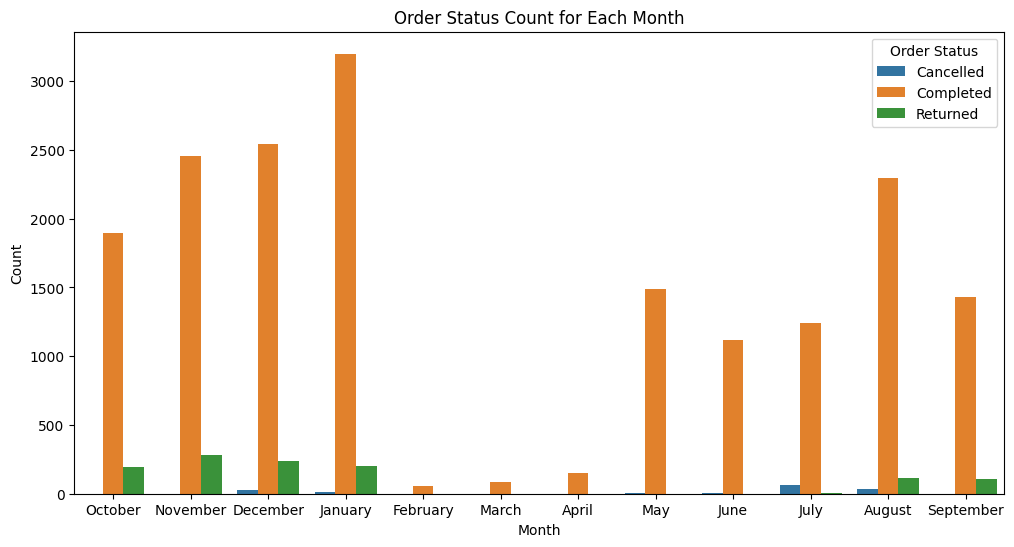

In [33]:

# Countplot of order status for each month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Order Status', data=org_books)
plt.title('Order Status Count for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



# Order Status Count for Each year


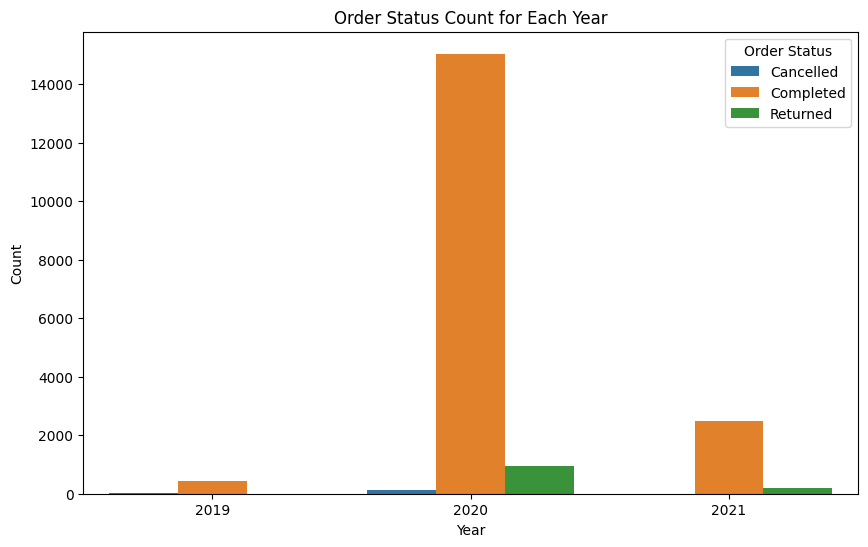

In [34]:
# Countplot of order status for each year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Order Status', data=org_books)
plt.title('Order Status Count for Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



# Order Status Count for Each Day


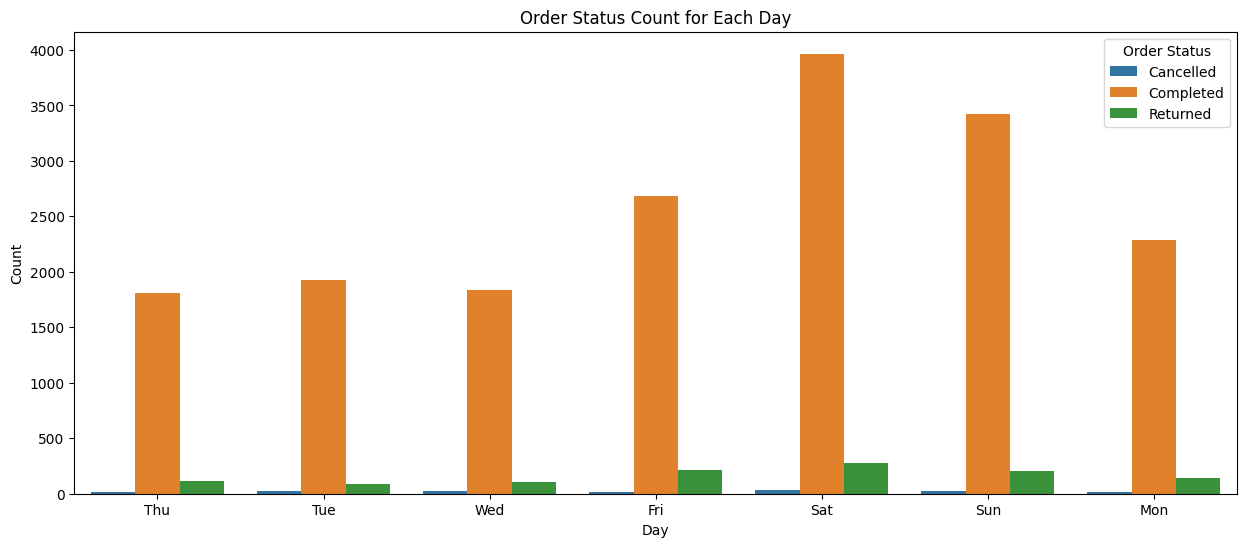

In [35]:
# Countplot of order status for each day
plt.figure(figsize=(15, 6))
sns.countplot(x='Day', hue='Order Status', data=org_books)
plt.title('Order Status Count for Each Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()
